In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
dfB=pd.read_csv('Limpio_Brasil.csv')
dfB=dfB.drop('Unnamed: 0', axis=1)
dfB.head(5)

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,Marcia Longras,09/04/2011,"Rio de Janeiro, Brazil","I'm a Brazilian lady, I was born in Rio de Jan...",within a few hours,93%,...,1.0,4.69,4.82,4.58,4.90,4.85,4.90,4.64,11.0,0.22
1,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",Erika,02/12/2011,"Rio de Janeiro, Brazil","Sou Erika tenho 37 anos ,casada, formada em ...",within a day,50%,...,0.0,4.67,5.00,4.90,4.90,5.00,4.90,4.67,3.0,0.02
2,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",Renato / Louri,18/03/2011,"Rio de Janeiro, Brazil",*French version below \r\n\r\nWe host internat...,within an hour,99%,...,0.0,4.71,4.82,4.79,4.82,4.88,4.90,4.65,6.0,0.22
3,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,Nilda,06/09/2011,"Rio de Janeiro, Brazil",Gosto de conhecer pessoas e novas culturas e ...,within an hour,100%,...,2.0,5.00,4.94,5.00,5.00,5.00,4.83,4.92,1.0,0.51
4,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,Jaqueline,04/12/2011,"Rio de Janeiro, Brazil",SimpÃ¡tica e gosto de novos amigos. Meu lazer...,within a day,50%,...,0.0,4.68,4.80,4.76,4.80,4.83,4.77,4.60,1.0,0.24


In [3]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36967 entries, 0 to 36966
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    36967 non-null  object 
 1   source                          36967 non-null  object 
 2   name                            36967 non-null  object 
 3   description                     36967 non-null  object 
 4   host_name                       36967 non-null  object 
 5   host_since                      36967 non-null  object 
 6   host_location                   36967 non-null  object 
 7   host_about                      36967 non-null  object 
 8   host_response_time              36967 non-null  object 
 9   host_response_rate              36967 non-null  object 
 10  host_acceptance_rate            36967 non-null  object 
 11  host_is_superhost               36967 non-null  object 
 12  host_verifications              

In [4]:
from turtle import color

In [5]:
# Filtrar por tipo de habitación en Brasil
dfB_private = dfB[dfB["room_type"] == "Private room"]
dfB_entire = dfB[dfB["room_type"] == "Entire home/apt"]
dfB_shared = dfB[dfB["room_type"] == "Shared room"]
dfB_hotel = dfB[dfB["room_type"] == "Hotel room"]

#Verificar la cantidad de registros en cada DataFrame
print("Private room:", len(dfB_private))
print("Entire home/apt:", len(dfB_entire))
print("Shared room:", len(dfB_shared))
print("Hotel room:", len(dfB_hotel))

Private room: 7231
Entire home/apt: 29079
Shared room: 629
Hotel room: 28


<Axes: xlabel='room_type', ylabel='price'>

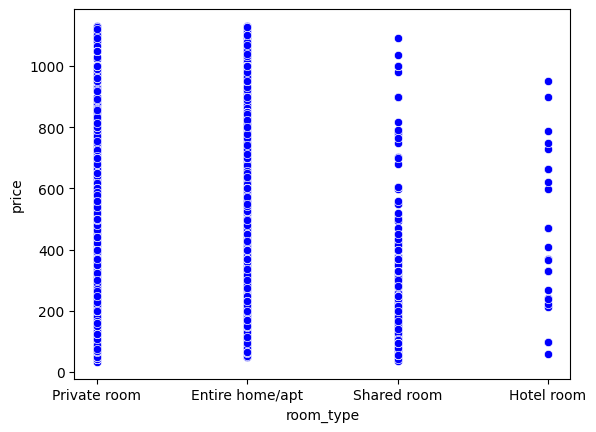

In [6]:
sns.scatterplot(x='room_type', y='price', color='blue', data=dfB)

In [7]:
dfB['host_response_rate'] = dfB['host_response_rate'].str.replace('%', '').astype(float) / 100
dfB['host_acceptance_rate'] = dfB['host_acceptance_rate'].str.replace('%', '').astype(float) / 100
dfB['host_is_superhost'] = dfB['host_is_superhost'].map({'t': True, 'f': False})


# Verificar la conversión
dfB[['host_response_rate', 'host_acceptance_rate']].head()

,host_response_rate,host_acceptance_rate
0,0.93,0.88
1,0.50,0.76
2,0.99,0.73
3,1.00,0.97
4,0.50,0.67


In [8]:
dfB['host_is_superhost'] = dfB['host_is_superhost'].astype(int)

# Verificar la conversión
print(dfB['host_is_superhost'].unique())

[0 1]


In [9]:
print(dfB['review_scores_cleanliness'].unique())

[4.58 4.9  4.79 5.   4.76 4.6  4.49 4.72 4.63 4.8  4.92 4.68 4.86 4.78
 4.81 4.73 4.74 4.93 4.5  4.94 4.61 4.87 4.82 4.95 4.47 4.69 4.88 4.54
 4.67 4.85 4.91 4.52 4.99 4.83 4.66 4.98 4.96 4.53 4.75 4.65 4.77 4.56
 4.89 4.84 4.59 4.55 4.57 4.71 4.48 4.7  4.62 4.64 4.97 4.46 4.51]


In [10]:
df_encoded = pd.get_dummies(dfB, columns=['property_type', 'room_type', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable'], drop_first=True)

# Verificar el resultado
df_encoded.head()

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,Marcia Longras,09/04/2011,"Rio de Janeiro, Brazil","I'm a Brazilian lady, I was born in Rio de Jan...",within a few hours,0.93,...,False,False,False,False,True,False,False,True,True,False
1,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",Erika,02/12/2011,"Rio de Janeiro, Brazil","Sou Erika tenho 37 anos ,casada, formada em ...",within a day,0.50,...,False,False,False,False,False,False,False,True,True,False
2,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",Renato / Louri,18/03/2011,"Rio de Janeiro, Brazil",*French version below \r\n\r\nWe host internat...,within an hour,0.99,...,False,False,False,False,False,False,True,True,True,False
3,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,Nilda,06/09/2011,"Rio de Janeiro, Brazil",Gosto de conhecer pessoas e novas culturas e ...,within an hour,1.00,...,False,False,False,False,False,False,True,True,True,False
4,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,Jaqueline,04/12/2011,"Rio de Janeiro, Brazil",SimpÃ¡tica e gosto de novos amigos. Meu lazer...,within a day,0.50,...,False,False,False,False,False,False,False,True,True,False


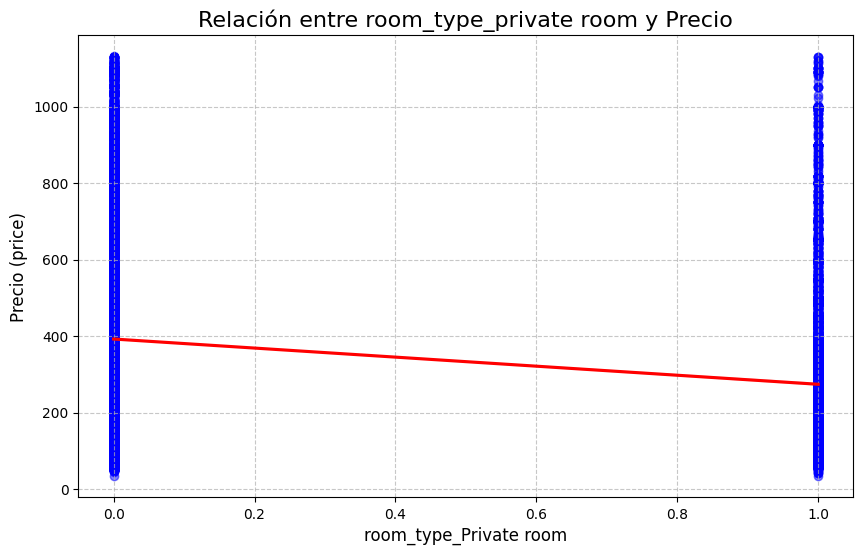

In [11]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    x='room_type_Private room',  # Eje x: Capacidad de alojamiento
    y='price',  # Eje y: Precio
    data=df_encoded,  # Datos
    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Personalizar los puntos
    line_kws={'color': 'red'}  # Personalizar la línea de regresión
)

# Personalizar el gráfico
plt.title('Relación entre room_type_private room y Precio', fontsize=16)
plt.xlabel('room_type_Private room', fontsize=12)
plt.ylabel('Precio (price)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [12]:
df_encoded

,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,Marcia Longras,09/04/2011,"Rio de Janeiro, Brazil","I'm a Brazilian lady, I was born in Rio de Jan...",within a few hours,0.93,...,False,False,False,False,True,False,False,True,True,False
1,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",Erika,02/12/2011,"Rio de Janeiro, Brazil","Sou Erika tenho 37 anos ,casada, formada em ...",within a day,0.50,...,False,False,False,False,False,False,False,True,True,False
2,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",Renato / Louri,18/03/2011,"Rio de Janeiro, Brazil",*French version below \r\n\r\nWe host internat...,within an hour,0.99,...,False,False,False,False,False,False,True,True,True,False
3,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,Nilda,06/09/2011,"Rio de Janeiro, Brazil",Gosto de conhecer pessoas e novas culturas e ...,within an hour,1.00,...,False,False,False,False,False,False,True,True,True,False
4,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,Jaqueline,04/12/2011,"Rio de Janeiro, Brazil",SimpÃ¡tica e gosto de novos amigos. Meu lazer...,within a day,0.50,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,25/09/2024,city scrape,Maravilha 15,Embrace simplicity in this quiet and well-loca...,Sara Regina De,20/01/2017,"Rio de Janeiro, Brazil","I am a social person, who likes to provide the...",within an hour,1.00,...,False,False,False,False,True,False,True,True,False,False
36963,26/09/2024,city scrape,Sua casa na praia de Copacabana,Welcome to your getaway in Copacabana! This ap...,Nathalia Simon,05/10/2015,"Rio de Janeiro, Brazil","I am a social person, who likes to provide the...",within a day,0.89,...,False,False,False,False,False,False,False,True,True,True
36964,25/09/2024,city scrape,Apt a 300m da praia do Recreio,Relax with the whole family in this quiet acco...,Robert,07/08/2024,"Rio de Janeiro, Brazil","I am a social person, who likes to provide the...",within an hour,1.00,...,False,False,False,False,False,False,False,True,True,False
36965,25/09/2024,city scrape,Casa da Dety,You will have a great time in this comfortable...,Antonia Eridete,03/02/2024,"Mexico City, Mexico","I am a social person, who likes to provide the...",within an hour,1.00,...,False,False,False,False,False,False,False,False,True,True


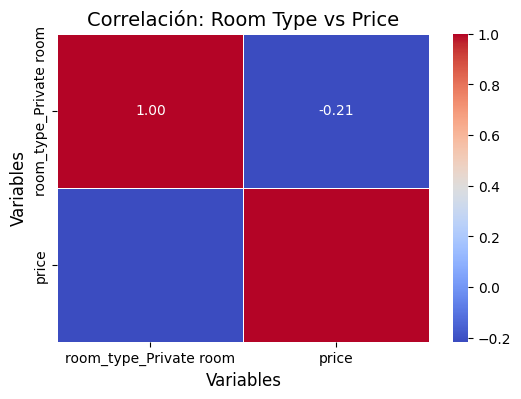

In [125]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['room_type_Private room', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Room Type vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Mostrar el gráfico
plt.show()

ROOM TYPE VS PRICE

In [13]:
x_room = df_encoded[['room_type_Private room']]  # Columnas codificadas de room_type
y_room = df_encoded['price']  # Variable dependiente

In [14]:
from sklearn.model_selection import train_test_split

# Dividir los datos en 80% entrenamiento y 20% prueba
x_train, x_test, y_train, y_test = train_test_split(x_room, y_room, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model_room = LinearRegression()

# Entrenar el modelo
model_room.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred_room = model_room.predict(x_test)
y_pred_room

array([392.50718167, 392.50718167, 392.50718167, ..., 392.50718167,
       274.76193416, 392.50718167])

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred_room)
print(f'Error Cuadrático Medio (MSE): {mse}')

# Calcular el Coeficiente de Determinación (R²)
r2 = r2_score(y_test, y_pred_room)
print(f'Coeficiente de Determinación (R²): {r2}')

Error Cuadrático Medio (MSE): 44231.941884558335
Coeficiente de Determinación (R²): 0.04813110915350194


In [18]:
# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': x_room.columns,
    'Coeficiente': model_room.coef_
})
print(coeficientes)

# Intercepto
print(f'Intercepto: {model_room.intercept_}')

                 Variable  Coeficiente
0  room_type_Private room  -117.745248
Intercepto: 392.50718166884144


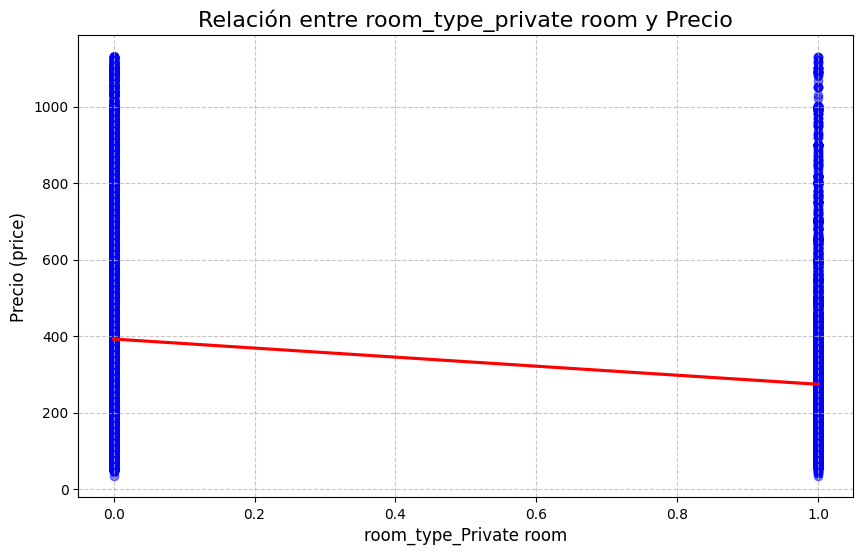

In [19]:
# Crear el gráfico de dispersión con línea de regresión
plt.figure(figsize=(10, 6))
sns.regplot(
    x='room_type_Private room',  # Eje x: Capacidad de alojamiento
    y='price',  # Eje y: Precio
    data=df_encoded,  # Datos
    scatter_kws={'color': 'blue', 'alpha': 0.5},  # Personalizar los puntos
    line_kws={'color': 'red'}  # Personalizar la línea de regresión
)

# Personalizar el gráfico
plt.title('Relación entre room_type_private room y Precio', fontsize=16)
plt.xlabel('room_type_Private room', fontsize=12)
plt.ylabel('Precio (price)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

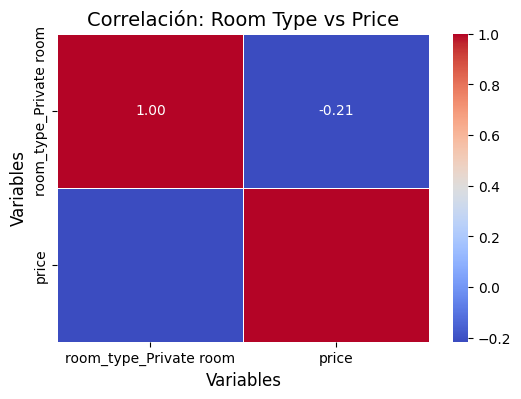

In [126]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['room_type_Private room', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Room Type vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


PRICE VS HOST_ACCEPTANCE RATE

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

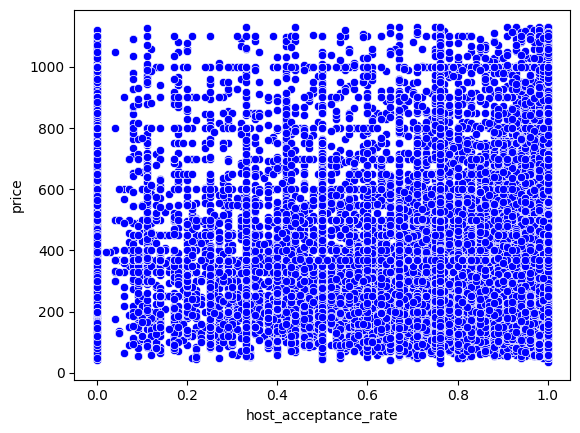

In [20]:
from turtle import color   
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df_encoded)

In [21]:
Vars_Indep=dfB[['host_acceptance_rate']]
Vars_Dep=dfB['price']

In [22]:
from sklearn.linear_model import LinearRegression
model_rate=LinearRegression()

In [23]:
type(model_rate)

sklearn.linear_model._base.LinearRegression

In [24]:
model_rate.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [25]:
model_rate.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-68.00493114]),
 'rank_': 1,
 'singular_': array([55.23259156]),
 'intercept_': 421.0738715103569}

In [26]:
y_pred_rate=model_rate.predict(X=df_encoded[['host_acceptance_rate']])
y_pred_rate

array([361.22953211, 369.39012385, 371.43027178, ..., 369.39012385,
       357.14923624, 359.86943349])

In [27]:
df_encoded.insert(0,'y_pred_rate',y_pred_rate)
df_encoded

,y_pred_rate,last_scraped,source,name,description,host_name,host_since,host_location,host_about,host_response_time,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,361.229532,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,Marcia Longras,09/04/2011,"Rio de Janeiro, Brazil","I'm a Brazilian lady, I was born in Rio de Jan...",within a few hours,...,False,False,False,False,True,False,False,True,True,False
1,369.390124,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",Erika,02/12/2011,"Rio de Janeiro, Brazil","Sou Erika tenho 37 anos ,casada, formada em ...",within a day,...,False,False,False,False,False,False,False,True,True,False
2,371.430272,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",Renato / Louri,18/03/2011,"Rio de Janeiro, Brazil",*French version below \r\n\r\nWe host internat...,within an hour,...,False,False,False,False,False,False,True,True,True,False
3,355.109088,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,Nilda,06/09/2011,"Rio de Janeiro, Brazil",Gosto de conhecer pessoas e novas culturas e ...,within an hour,...,False,False,False,False,False,False,True,True,True,False
4,375.510568,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,Jaqueline,04/12/2011,"Rio de Janeiro, Brazil",SimpÃ¡tica e gosto de novos amigos. Meu lazer...,within a day,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,354.429039,25/09/2024,city scrape,Maravilha 15,Embrace simplicity in this quiet and well-loca...,Sara Regina De,20/01/2017,"Rio de Janeiro, Brazil","I am a social person, who likes to provide the...",within an hour,...,False,False,False,False,True,False,True,True,False,False
36963,369.390124,26/09/2024,city scrape,Sua casa na praia de Copacabana,Welcome to your getaway in Copacabana! This ap...,Nathalia Simon,05/10/2015,"Rio de Janeiro, Brazil","I am a social person, who likes to provide the...",within a day,...,False,False,False,False,False,False,False,True,True,True
36964,369.390124,25/09/2024,city scrape,Apt a 300m da praia do Recreio,Relax with the whole family in this quiet acco...,Robert,07/08/2024,"Rio de Janeiro, Brazil","I am a social person, who likes to provide the...",within an hour,...,False,False,False,False,False,False,False,True,True,False
36965,357.149236,25/09/2024,city scrape,Casa da Dety,You will have a great time in this comfortable...,Antonia Eridete,03/02/2024,"Mexico City, Mexico","I am a social person, who likes to provide the...",within an hour,...,False,False,False,False,False,False,False,False,True,True


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

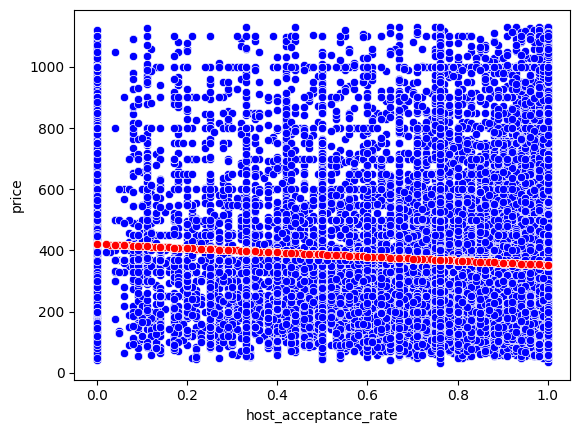

In [28]:
sns.scatterplot(x='host_acceptance_rate',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_acceptance_rate',y='y_pred_rate',color='red',data=df_encoded)

In [87]:
from sklearn.metrics import r2_score
r2 = r2_score(dfB['price'], y_pred_rate)
print(f"R^2 del modelo: {r2:.4f}")

R^2 del modelo: 0.0080


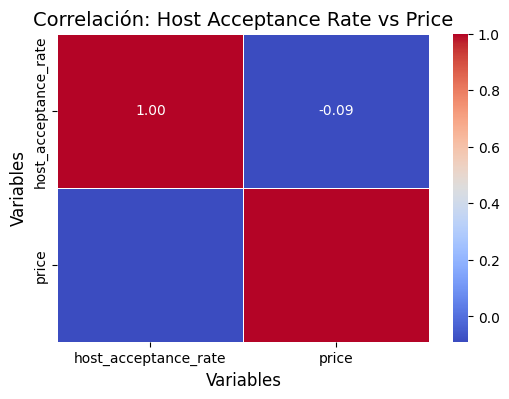

In [112]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['host_acceptance_rate', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Host Acceptance Rate vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Mostrar el gráfico
plt.show()

PRICE VS HOST IS SUPERHOST

<Axes: xlabel='host_is_superhost_1', ylabel='price'>

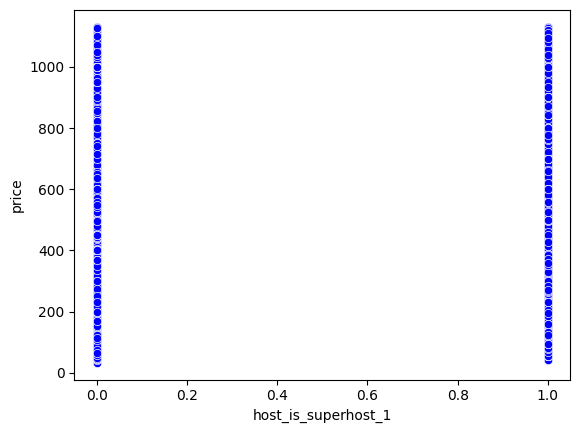

In [29]:
sns.scatterplot(x='host_is_superhost_1',y='price',color='blue',data=df_encoded)

In [30]:
Vars_Indep=df_encoded[['host_is_superhost_1']]
Vars_Dep=dfB['price']

In [31]:
model_super=LinearRegression()

In [32]:
type(model_super)

sklearn.linear_model._base.LinearRegression

In [33]:
model_super.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [34]:
model_super.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost_1'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-48.29808793]),
 'rank_': 1,
 'singular_': array([87.99639075]),
 'intercept_': 383.5810151970991}

In [35]:
y_pred_super=model_super.predict(X=df_encoded[['host_is_superhost_1']])
y_pred_super

array([383.5810152 , 383.5810152 , 335.28292727, ..., 383.5810152 ,
       383.5810152 , 383.5810152 ])

In [36]:
df_encoded.insert(0,'y_pred_super',y_pred_super)
df_encoded

,y_pred_super,y_pred_rate,last_scraped,source,name,description,host_name,host_since,host_location,host_about,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,383.581015,361.229532,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,Marcia Longras,09/04/2011,"Rio de Janeiro, Brazil","I'm a Brazilian lady, I was born in Rio de Jan...",...,False,False,False,False,True,False,False,True,True,False
1,383.581015,369.390124,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",Erika,02/12/2011,"Rio de Janeiro, Brazil","Sou Erika tenho 37 anos ,casada, formada em ...",...,False,False,False,False,False,False,False,True,True,False
2,335.282927,371.430272,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",Renato / Louri,18/03/2011,"Rio de Janeiro, Brazil",*French version below \r\n\r\nWe host internat...,...,False,False,False,False,False,False,True,True,True,False
3,335.282927,355.109088,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,Nilda,06/09/2011,"Rio de Janeiro, Brazil",Gosto de conhecer pessoas e novas culturas e ...,...,False,False,False,False,False,False,True,True,True,False
4,383.581015,375.510568,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,Jaqueline,04/12/2011,"Rio de Janeiro, Brazil",SimpÃ¡tica e gosto de novos amigos. Meu lazer...,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,335.282927,354.429039,25/09/2024,city scrape,Maravilha 15,Embrace simplicity in this quiet and well-loca...,Sara Regina De,20/01/2017,"Rio de Janeiro, Brazil","I am a social person, who likes to provide the...",...,False,False,False,False,True,False,True,True,False,False
36963,383.581015,369.390124,26/09/2024,city scrape,Sua casa na praia de Copacabana,Welcome to your getaway in Copacabana! This ap...,Nathalia Simon,05/10/2015,"Rio de Janeiro, Brazil","I am a social person, who likes to provide the...",...,False,False,False,False,False,False,False,True,True,True
36964,383.581015,369.390124,25/09/2024,city scrape,Apt a 300m da praia do Recreio,Relax with the whole family in this quiet acco...,Robert,07/08/2024,"Rio de Janeiro, Brazil","I am a social person, who likes to provide the...",...,False,False,False,False,False,False,False,True,True,False
36965,383.581015,357.149236,25/09/2024,city scrape,Casa da Dety,You will have a great time in this comfortable...,Antonia Eridete,03/02/2024,"Mexico City, Mexico","I am a social person, who likes to provide the...",...,False,False,False,False,False,False,False,False,True,True


<Axes: xlabel='host_is_superhost_1', ylabel='price'>

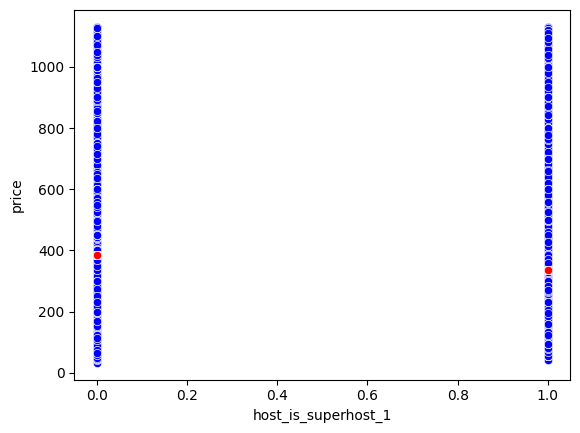

In [37]:
sns.scatterplot(x='host_is_superhost_1',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_is_superhost_1',y='y_pred_super',color='red',data=df_encoded)

In [92]:
r2 = r2_score(df_encoded['price'], y_pred_super)
print(f"R² del modelo (Superhost vs Precio): {r2:.4f}")

R² del modelo (Superhost vs Precio): 0.0102


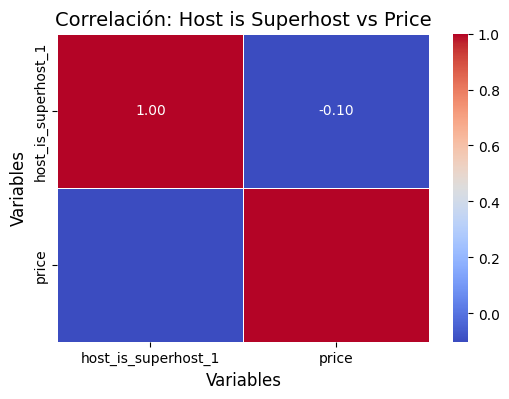

In [115]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['host_is_superhost_1', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Host is Superhost vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


ACCOMMODATES VS BATHROOMS

<Axes: xlabel='accommodates', ylabel='bedrooms'>

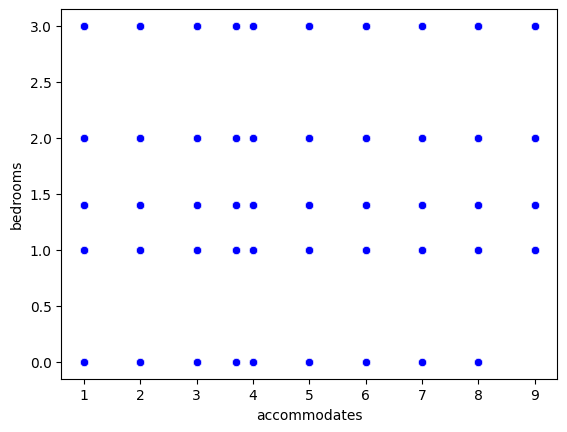

In [38]:
sns.scatterplot(x='accommodates',y='bedrooms',color='blue',data=df_encoded)

In [39]:
Vars_Indep=df_encoded[['bedrooms']]
Vars_Dep=df_encoded['accommodates']

In [40]:
from sklearn.linear_model import LinearRegression
model_bedrooms=LinearRegression()

In [41]:
model_bedrooms.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [42]:
type(model_bedrooms)

sklearn.linear_model._base.LinearRegression

In [43]:
model_bedrooms.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bedrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.40570048]),
 'rank_': 1,
 'singular_': array([137.0647421]),
 'intercept_': 1.707397348155115}

In [44]:
y_pred_bedrooms=model_bedrooms.predict(X=df_encoded[['bedrooms']])
y_pred_bedrooms

array([3.11309783, 1.70739735, 3.11309783, ..., 3.11309783, 3.11309783,
       3.11309783])

In [45]:
df_encoded.insert(0,'y_pred_bedrooms',y_pred_bedrooms)
df_encoded

,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,description,host_name,host_since,host_location,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,3.113098,383.581015,361.229532,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,Marcia Longras,09/04/2011,"Rio de Janeiro, Brazil",...,False,False,False,False,True,False,False,True,True,False
1,1.707397,383.581015,369.390124,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",Erika,02/12/2011,"Rio de Janeiro, Brazil",...,False,False,False,False,False,False,False,True,True,False
2,3.113098,335.282927,371.430272,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",Renato / Louri,18/03/2011,"Rio de Janeiro, Brazil",...,False,False,False,False,False,False,True,True,True,False
3,4.518798,335.282927,355.109088,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,Nilda,06/09/2011,"Rio de Janeiro, Brazil",...,False,False,False,False,False,False,True,True,True,False
4,3.113098,383.581015,375.510568,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,Jaqueline,04/12/2011,"Rio de Janeiro, Brazil",...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,3.113098,335.282927,354.429039,25/09/2024,city scrape,Maravilha 15,Embrace simplicity in this quiet and well-loca...,Sara Regina De,20/01/2017,"Rio de Janeiro, Brazil",...,False,False,False,False,True,False,True,True,False,False
36963,3.113098,383.581015,369.390124,26/09/2024,city scrape,Sua casa na praia de Copacabana,Welcome to your getaway in Copacabana! This ap...,Nathalia Simon,05/10/2015,"Rio de Janeiro, Brazil",...,False,False,False,False,False,False,False,True,True,True
36964,3.113098,383.581015,369.390124,25/09/2024,city scrape,Apt a 300m da praia do Recreio,Relax with the whole family in this quiet acco...,Robert,07/08/2024,"Rio de Janeiro, Brazil",...,False,False,False,False,False,False,False,True,True,False
36965,3.113098,383.581015,357.149236,25/09/2024,city scrape,Casa da Dety,You will have a great time in this comfortable...,Antonia Eridete,03/02/2024,"Mexico City, Mexico",...,False,False,False,False,False,False,False,False,True,True


<Axes: xlabel='accommodates', ylabel='bedrooms'>

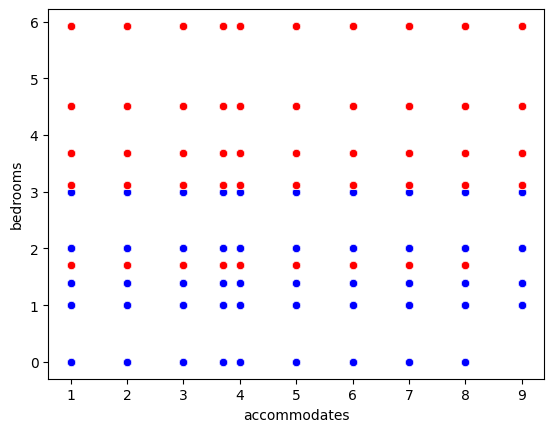

In [46]:
sns.scatterplot(x='accommodates',y='bedrooms',color='blue',data=df_encoded)
sns.scatterplot(x='accommodates',y='y_pred_bedrooms',color='red',data=df_encoded)

In [93]:
r2 = r2_score(df_encoded['bedrooms'], y_pred_bedrooms)
print(f"R² del modelo (Bedrooms vs Accommodates): {r2:.4f}")

R² del modelo (Bedrooms vs Accommodates): -9.4046


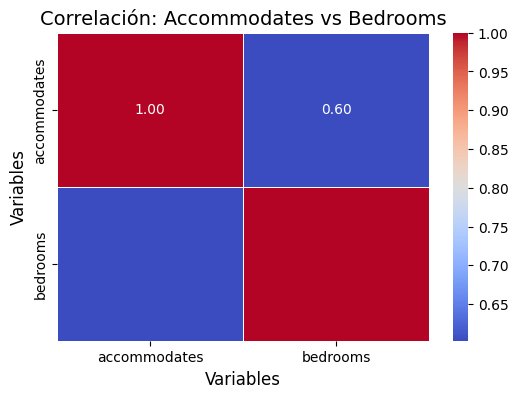

In [117]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['accommodates', 'bedrooms']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Accommodates vs Bedrooms", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


PRICE VS REVIEW SCORES CLEANLINESS

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

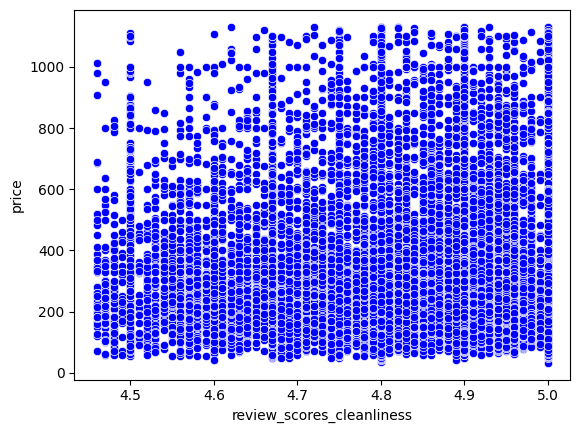

In [47]:
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df_encoded)

In [48]:
Vars_Indep=df_encoded[['review_scores_cleanliness']]
Vars_Dep=df_encoded['price']

In [49]:
model_clean=LinearRegression()

In [50]:
type(model_clean)

sklearn.linear_model._base.LinearRegression

In [51]:
model_clean.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [52]:
model_clean.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([10.88810012]),
 'rank_': 1,
 'singular_': array([24.42695543]),
 'intercept_': 316.2561841402927}

In [53]:
y_pred_clean=model_clean.predict(X=df_encoded[['review_scores_cleanliness']])
y_pred_clean

array([366.12368268, 369.60787472, 368.41018371, ..., 368.51906471,
       368.51906471, 368.51906471])

In [54]:
df_encoded.insert(0,'y_pred_clean',y_pred_clean)
df_encoded

,y_pred_clean,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,description,host_name,host_since,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,366.123683,3.113098,383.581015,361.229532,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,Marcia Longras,09/04/2011,...,False,False,False,False,True,False,False,True,True,False
1,369.607875,1.707397,383.581015,369.390124,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",Erika,02/12/2011,...,False,False,False,False,False,False,False,True,True,False
2,368.410184,3.113098,335.282927,371.430272,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",Renato / Louri,18/03/2011,...,False,False,False,False,False,False,True,True,True,False
3,370.696685,4.518798,335.282927,355.109088,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,Nilda,06/09/2011,...,False,False,False,False,False,False,True,True,True,False
4,368.083541,3.113098,383.581015,375.510568,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,Jaqueline,04/12/2011,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,368.519065,3.113098,335.282927,354.429039,25/09/2024,city scrape,Maravilha 15,Embrace simplicity in this quiet and well-loca...,Sara Regina De,20/01/2017,...,False,False,False,False,True,False,True,True,False,False
36963,368.519065,3.113098,383.581015,369.390124,26/09/2024,city scrape,Sua casa na praia de Copacabana,Welcome to your getaway in Copacabana! This ap...,Nathalia Simon,05/10/2015,...,False,False,False,False,False,False,False,True,True,True
36964,368.519065,3.113098,383.581015,369.390124,25/09/2024,city scrape,Apt a 300m da praia do Recreio,Relax with the whole family in this quiet acco...,Robert,07/08/2024,...,False,False,False,False,False,False,False,True,True,False
36965,368.519065,3.113098,383.581015,357.149236,25/09/2024,city scrape,Casa da Dety,You will have a great time in this comfortable...,Antonia Eridete,03/02/2024,...,False,False,False,False,False,False,False,False,True,True


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

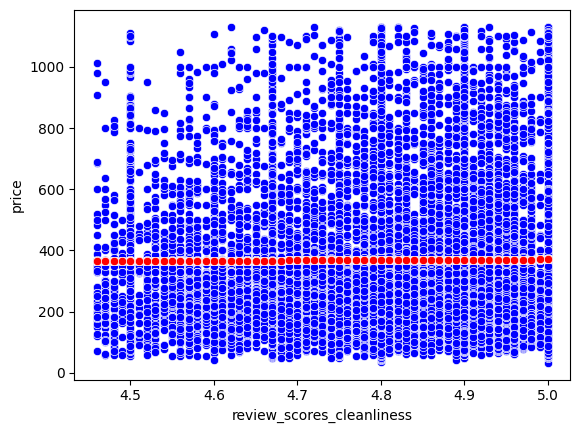

In [55]:
sns.scatterplot(x='review_scores_cleanliness',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='review_scores_cleanliness',y='y_pred_clean',color='red',data=df_encoded)

In [94]:
r2 = r2_score(df_encoded['price'], y_pred_clean)
print(f"R² del modelo (Review Score Cleanliness vs Precio): {r2:.4f}")

R² del modelo (Review Score Cleanliness vs Precio): 0.0000


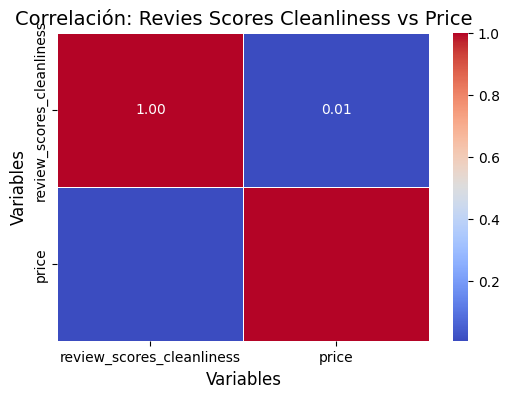

In [118]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['review_scores_cleanliness', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Revies Scores Cleanliness vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


PRICE VS HOST IDENTITY VERIFIED

<Axes: xlabel='host_identity_verified_t', ylabel='price'>

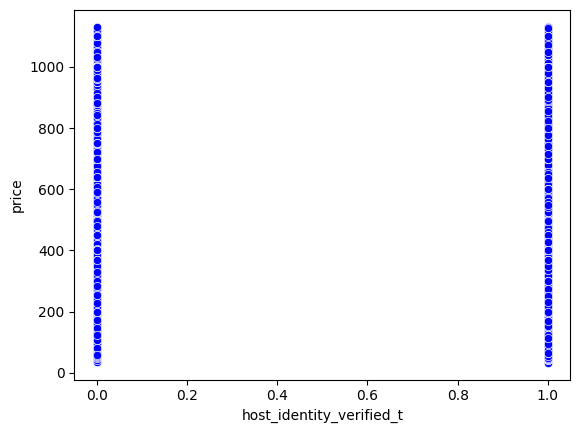

In [56]:
sns.scatterplot(x='host_identity_verified_t',y='price',color='blue',data=df_encoded)

In [57]:
Vars_Indep=df_encoded[['host_identity_verified_t']]
Vars_Dep=df_encoded['price']

In [58]:
model_verified=LinearRegression()

In [59]:
type(model_verified)

sklearn.linear_model._base.LinearRegression

In [60]:
model_verified.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [61]:
model_verified.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified_t'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-20.74758292]),
 'rank_': 1,
 'singular_': array([71.13742193]),
 'intercept_': 386.5072219467868}

In [62]:
y_pred_verified=model_verified.predict(X=df_encoded[['host_identity_verified_t']])
y_pred_verified

array([365.75963902, 365.75963902, 365.75963902, ..., 365.75963902,
       365.75963902, 365.75963902])

In [63]:
df_encoded.insert(0,'y_pred_verified',y_pred_verified)
df_encoded

,y_pred_verified,y_pred_clean,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,description,host_name,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,365.759639,366.123683,3.113098,383.581015,361.229532,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,Marcia Longras,...,False,False,False,False,True,False,False,True,True,False
1,365.759639,369.607875,1.707397,383.581015,369.390124,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",Erika,...,False,False,False,False,False,False,False,True,True,False
2,365.759639,368.410184,3.113098,335.282927,371.430272,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",Renato / Louri,...,False,False,False,False,False,False,True,True,True,False
3,365.759639,370.696685,4.518798,335.282927,355.109088,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,Nilda,...,False,False,False,False,False,False,True,True,True,False
4,365.759639,368.083541,3.113098,383.581015,375.510568,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,Jaqueline,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,386.507222,368.519065,3.113098,335.282927,354.429039,25/09/2024,city scrape,Maravilha 15,Embrace simplicity in this quiet and well-loca...,Sara Regina De,...,False,False,False,False,True,False,True,True,False,False
36963,365.759639,368.519065,3.113098,383.581015,369.390124,26/09/2024,city scrape,Sua casa na praia de Copacabana,Welcome to your getaway in Copacabana! This ap...,Nathalia Simon,...,False,False,False,False,False,False,False,True,True,True
36964,365.759639,368.519065,3.113098,383.581015,369.390124,25/09/2024,city scrape,Apt a 300m da praia do Recreio,Relax with the whole family in this quiet acco...,Robert,...,False,False,False,False,False,False,False,True,True,False
36965,365.759639,368.519065,3.113098,383.581015,357.149236,25/09/2024,city scrape,Casa da Dety,You will have a great time in this comfortable...,Antonia Eridete,...,False,False,False,False,False,False,False,False,True,True


<Axes: xlabel='host_identity_verified_t', ylabel='price'>

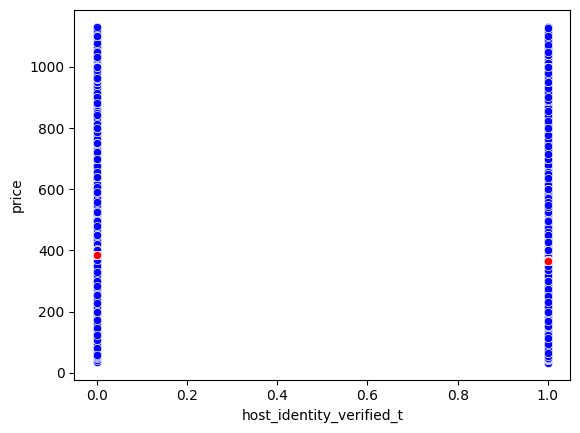

In [64]:
sns.scatterplot(x='host_identity_verified_t',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='host_identity_verified_t',y='y_pred_verified',color='red',data=df_encoded)

In [95]:
r2 = r2_score(df_encoded['price'], y_pred_verified)
print(f"R² del modelo (Host Identity Verified vs Precio): {r2:.4f}")

R² del modelo (Host Identity Verified vs Precio): 0.0012


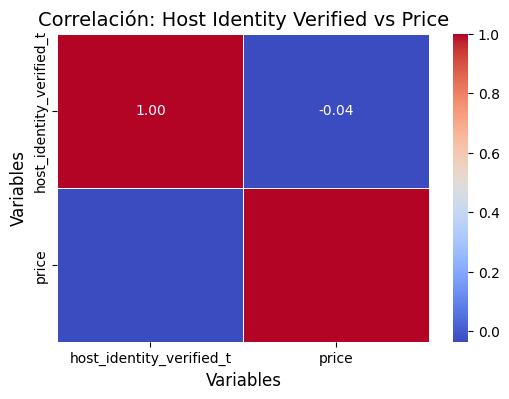

In [119]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['host_identity_verified_t', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Host Identity Verified vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


PRICE VS INSTANT_BOOKBLE

<Axes: xlabel='instant_bookable_t', ylabel='price'>

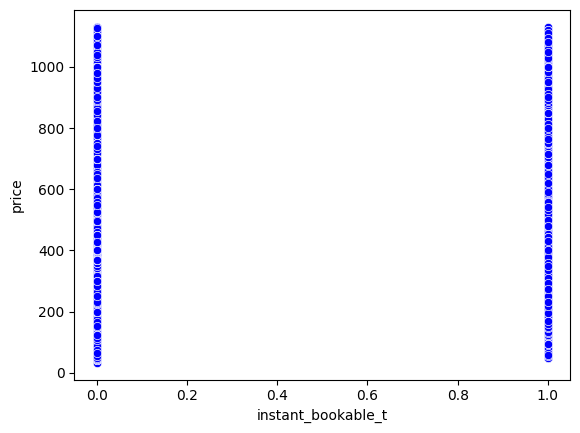

In [65]:
sns.scatterplot(x='instant_bookable_t',y='price',color='blue',data=df_encoded)

In [66]:
Vars_Indep=df_encoded[['instant_bookable_t']]
Vars_Dep=df_encoded['price']

In [67]:
model_bookable=LinearRegression()

In [68]:
type(model_bookable)

sklearn.linear_model._base.LinearRegression

In [69]:
model_bookable.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [70]:
model_bookable.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable_t'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-16.73839754]),
 'rank_': 1,
 'singular_': array([80.19997931]),
 'intercept_': 372.9102981691366}

In [71]:
y_pred_bookable=model_bookable.predict(X=df_encoded[['instant_bookable_t']])
y_pred_bookable

array([372.91029817, 372.91029817, 372.91029817, ..., 372.91029817,
       356.17190063, 372.91029817])

In [72]:
df_encoded.insert(0,'y_pred_bookable',y_pred_bookable )
df_encoded

,y_pred_bookable,y_pred_verified,y_pred_clean,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,description,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,372.910298,365.759639,366.123683,3.113098,383.581015,361.229532,25/09/2024,city scrape,"Fascinating Rio, on the hills!",Your best option to stay if you want to visit ...,...,False,False,False,False,True,False,False,True,True,False
1,372.910298,365.759639,369.607875,1.707397,383.581015,369.390124,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,"The studio is in an excellent location , dire...",...,False,False,False,False,False,False,False,True,True,False
2,372.910298,365.759639,368.410184,3.113098,335.282927,371.430272,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I","Bedroom and living room, with a private bathro...",...,False,False,False,False,False,False,True,True,True,False
3,372.910298,365.759639,370.696685,4.518798,335.282927,355.109088,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,Our apartment is the perfect choice for those ...,...,False,False,False,False,False,False,True,True,True,False
4,372.910298,365.759639,368.083541,3.113098,383.581015,375.510568,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",Your best option to stay if you want to visit ...,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,372.910298,386.507222,368.519065,3.113098,335.282927,354.429039,25/09/2024,city scrape,Maravilha 15,Embrace simplicity in this quiet and well-loca...,...,False,False,False,False,True,False,True,True,False,False
36963,356.171901,365.759639,368.519065,3.113098,383.581015,369.390124,26/09/2024,city scrape,Sua casa na praia de Copacabana,Welcome to your getaway in Copacabana! This ap...,...,False,False,False,False,False,False,False,True,True,True
36964,372.910298,365.759639,368.519065,3.113098,383.581015,369.390124,25/09/2024,city scrape,Apt a 300m da praia do Recreio,Relax with the whole family in this quiet acco...,...,False,False,False,False,False,False,False,True,True,False
36965,356.171901,365.759639,368.519065,3.113098,383.581015,357.149236,25/09/2024,city scrape,Casa da Dety,You will have a great time in this comfortable...,...,False,False,False,False,False,False,False,False,True,True


<Axes: xlabel='instant_bookable_t', ylabel='price'>

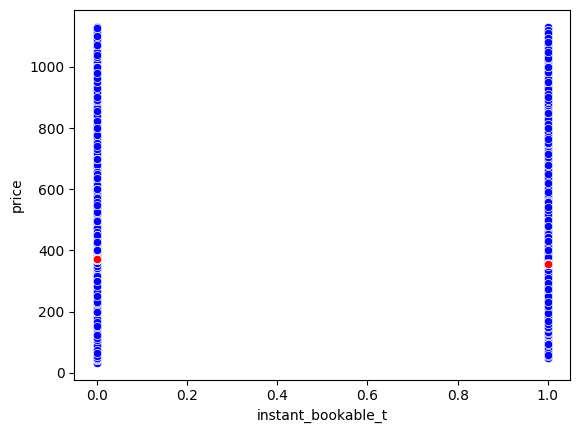

In [73]:
sns.scatterplot(x='instant_bookable_t',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='instant_bookable_t',y='y_pred_bookable',color='red',data=df_encoded)

In [96]:
r2 = r2_score(df_encoded['price'], y_pred_bookable)
print(f"R² del modelo (Instant Bookable vs Precio): {r2:.4f}")

R² del modelo (Instant Bookable vs Precio): 0.0010


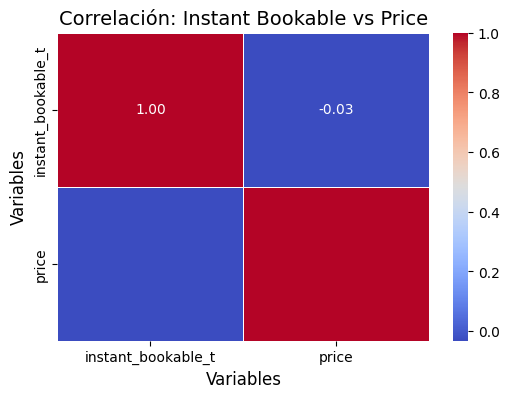

In [120]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['instant_bookable_t', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Instant Bookable vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


PRICE VS PROPERTY_TYPE

<Axes: xlabel='property_type_Shipping container', ylabel='price'>

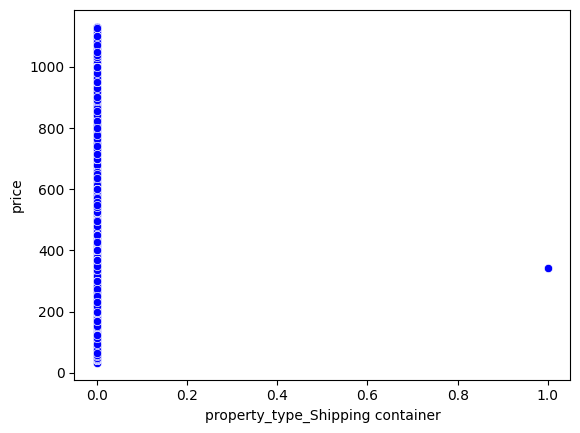

In [74]:
sns.scatterplot(x='property_type_Shipping container',y='price',color='blue',data=df_encoded)

In [75]:
Vars_Indep=df_encoded[['property_type_Shipping container']]
Vars_Dep=df_encoded['price']

In [76]:
model_property=LinearRegression()

In [77]:
type(model_property)

sklearn.linear_model._base.LinearRegression

In [78]:
model_property.fit(X=Vars_Indep,y=Vars_Dep)

LinearRegression()

In [79]:
model_property.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type_Shipping container'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-26.15644646]),
 'rank_': 1,
 'singular_': array([0.99998647]),
 'intercept_': 369.15644646431855}

In [80]:
y_pred_property=model_property.predict(X=df_encoded[['property_type_Shipping container']])
y_pred_property

array([369.15644646, 369.15644646, 369.15644646, ..., 369.15644646,
       369.15644646, 369.15644646])

In [81]:
df_encoded.insert(0,'y_pred_property',y_pred_property)
df_encoded

,y_pred_property,y_pred_bookable,y_pred_verified,y_pred_clean,y_pred_bedrooms,y_pred_super,y_pred_rate,last_scraped,source,name,...,property_type_Shipping container,property_type_Tiny home,property_type_Treehouse,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1,host_has_profile_pic_t,host_identity_verified_t,instant_bookable_t
0,369.156446,372.910298,365.759639,366.123683,3.113098,383.581015,361.229532,25/09/2024,city scrape,"Fascinating Rio, on the hills!",...,False,False,False,False,True,False,False,True,True,False
1,369.156446,372.910298,365.759639,369.607875,1.707397,383.581015,369.390124,25/09/2024,city scrape,STUDIO RIO LAPA CARNIVAL,...,False,False,False,False,False,False,False,True,True,False
2,369.156446,372.910298,365.759639,368.410184,3.113098,335.282927,371.430272,26/09/2024,city scrape,"5 min a pÃ© - Praia de Copacabana, MetrÃ´, WiFi I",...,False,False,False,False,False,False,True,True,True,False
3,369.156446,372.910298,365.759639,370.696685,4.518798,335.282927,355.109088,25/09/2024,city scrape,Quintal da Lagoa - RefÃºgio Secreto quase Ipa...,...,False,False,False,False,False,False,True,True,True,False
4,369.156446,372.910298,365.759639,368.083541,3.113098,383.581015,375.510568,25/09/2024,city scrape,"Rio, hospedagem e tranquilidade",...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36962,369.156446,372.910298,386.507222,368.519065,3.113098,335.282927,354.429039,25/09/2024,city scrape,Maravilha 15,...,False,False,False,False,True,False,True,True,False,False
36963,369.156446,356.171901,365.759639,368.519065,3.113098,383.581015,369.390124,26/09/2024,city scrape,Sua casa na praia de Copacabana,...,False,False,False,False,False,False,False,True,True,True
36964,369.156446,372.910298,365.759639,368.519065,3.113098,383.581015,369.390124,25/09/2024,city scrape,Apt a 300m da praia do Recreio,...,False,False,False,False,False,False,False,True,True,False
36965,369.156446,356.171901,365.759639,368.519065,3.113098,383.581015,357.149236,25/09/2024,city scrape,Casa da Dety,...,False,False,False,False,False,False,False,False,True,True


<Axes: xlabel='property_type_Shipping container', ylabel='price'>

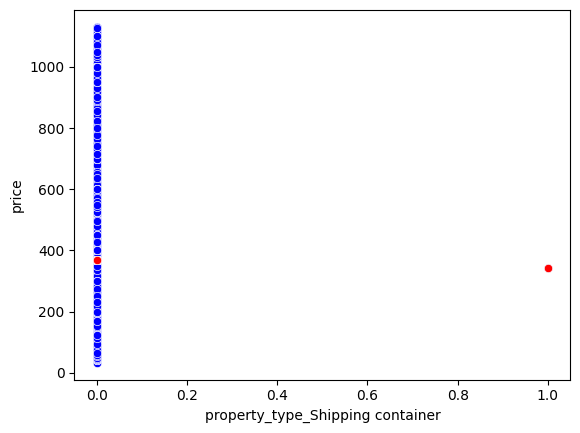

In [82]:
sns.scatterplot(x='property_type_Shipping container',y='price',color='blue',data=df_encoded)
sns.scatterplot(x='property_type_Shipping container',y='y_pred_property',color='red',data=df_encoded)

In [97]:
r2 = r2_score(df_encoded['price'], y_pred_property)
print(f"R² del modelo (Property Type vs Precio): {r2:.4f}")

R² del modelo (Property Type vs Precio): 0.0000


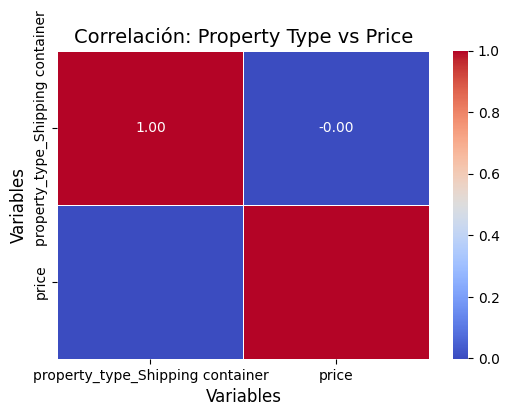

In [123]:
# Seleccionar las variables a comparar
df_corr = df_encoded[['property_type_Shipping container', 'price']].corr()
# Generar el heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Agregar título y etiquetas
plt.title("Correlación: Property Type vs Price", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)
# Mostrar el gráfico
plt.show()


MODELO MATEMATICO POR TIPO DE CUARTO 

In [83]:
# Crear un diccionario para almacenar resultados
resultados = {}

# Tipos de alojamiento
tipos_alojamiento = dfB["room_type"].unique()

# Iterar sobre cada tipo de alojamiento
for tipo in tipos_alojamiento:
    df_tipo = dfB[dfB["room_type"] == tipo].select_dtypes(include=['number'])  # Solo columnas numéricas
    
    # Matriz de correlaciones
    corr_matrix = df_tipo.corr()
    
    # Encontrar la variable con mayor correlación absoluta con 'price'
    corr_price = corr_matrix["price"].drop("price", errors="ignore").abs()
    if corr_price.empty:
        continue
    
    max_corr_var = corr_price.idxmax()  # Variable con mayor correlación
    max_corr_val = corr_price.max()     # Valor del coeficiente de Pearson
    
    # Guardar resultados
    resultados[tipo] = {"Variable más correlacionada": max_corr_var, "Coef. Pearson": max_corr_val}

# Convertir a DataFrame para visualizar
df_resultados = pd.DataFrame(resultados).T
df_resultados


,Variable más correlacionada,Coef. Pearson
Private room,number_of_reviews_ltm,0.288258
Entire home/apt,bathrooms,0.396808
Shared room,number_of_reviews_ltm,0.224951
Hotel room,host_total_listings_count,0.444332


In [103]:
# Agregar coeficiente de determinación R² al DataFrame
for tipo in resultados:
    variable = resultados[tipo]["Variable más correlacionada"]
    df_tipo = dfB[dfB["room_type"] == tipo].dropna(subset=["price", variable])  # Filtrar valores NaN
    
    X = df_tipo[[variable]]
    y = df_tipo["price"]
    
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    r2 = modelo.score(X, y)
    
    # Guardar el coeficiente de determinación R²
    resultados[tipo]["R²"] = r2

# Actualizar DataFrame de resultados
df_resultados = pd.DataFrame(resultados).T
df_resultados


,Variable más correlacionada,Coef. Pearson,R²
Private room,number_of_reviews_ltm,0.288258,0.083093
Entire home/apt,bathrooms,0.396808,0.157457
Shared room,number_of_reviews_ltm,0.224951,0.050603
Hotel room,host_total_listings_count,0.444332,0.197431


Mayor correlacion 

In [101]:
# Convertir todas las columnas posibles a numéricas
df_numeric = df_encoded.apply(pd.to_numeric, errors='coerce')

# Calcular la correlación de todas las variables con 'price'
correlaciones = df_numeric.corr()['price'].dropna().drop('price')

# Ordenar de mayor a menor (valores absolutos)
correlaciones_ordenadas = correlaciones.abs().sort_values(ascending=False)

# Mostrar todas las variables con su correlación
print("Correlación de todas las variables con price:")
print(correlaciones_ordenadas)


Correlación de todas las variables con price:
bedrooms                              0.386517
y_pred_bedrooms                       0.386517
bathrooms                             0.355475
accommodates                          0.339872
beds                                  0.253829
                                        ...   
y_pred_property                       0.000623
property_type_Earthen home            0.000513
property_type_Treehouse               0.000450
property_type_Private room in boat    0.000001
property_type_Castle                  0.000001
Name: price, Length: 122, dtype: float64


POR CADA TIPO DE PROPIEDAD COEFICIENTES DE DETERMINACION Y CORRELACION

In [104]:
# Agregar coeficiente de determinación R² al DataFrame
for tipo in resultados:
    variable = resultados[tipo]["Variable más correlacionada"]
    df_tipo = dfB[dfB["room_type"] == tipo].dropna(subset=["price", variable])  # Filtrar valores NaN
    
    X = df_tipo[[variable]]
    y = df_tipo["price"]
    
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    r2 = modelo.score(X, y)
    
    # Guardar el coeficiente de determinación R²
    resultados[tipo]["R²"] = r2

# Actualizar DataFrame de resultados
df_resultados = pd.DataFrame(resultados).T
df_resultados


,Variable más correlacionada,Coef. Pearson,R²
Private room,number_of_reviews_ltm,0.288258,0.083093
Entire home/apt,bathrooms,0.396808,0.157457
Shared room,number_of_reviews_ltm,0.224951,0.050603
Hotel room,host_total_listings_count,0.444332,0.197431


In [105]:
# Convertir todas las columnas posibles a numéricas
df_numeric = df_encoded.apply(pd.to_numeric, errors='coerce')

# Calcular la correlación con 'price'
correlaciones = df_numeric.corr()['price'].dropna().drop('price')

# Crear DataFrame con los resultados
tabla_correlaciones = pd.DataFrame({
    'Variable': correlaciones.index,
    'Correlación': correlaciones.values
})

# Ordenar de mayor a menor (en valor absoluto)
tabla_correlaciones['Correlación Abs'] = tabla_correlaciones['Correlación'].abs()
tabla_correlaciones = tabla_correlaciones.sort_values(by='Correlación Abs', ascending=False).drop(columns=['Correlación Abs'])

# Mostrar la tabla ordenada
print(tabla_correlaciones)


                               Variable  Correlación
13                             bedrooms     0.386517
4                       y_pred_bedrooms     0.386517
12                            bathrooms     0.355475
11                         accommodates     0.339872
14                                 beds     0.253829
..                                  ...          ...
0                       y_pred_property     0.000623
39           property_type_Earthen home     0.000513
114             property_type_Treehouse     0.000450
61   property_type_Private room in boat     0.000001
37                 property_type_Castle     0.000001

[122 rows x 2 columns]


MEJOR MODELO DE CORRELACION 

In [108]:
# Seleccionar las variables cuantitativas
columnas_cuantitativas = [
     'host_acceptance_rate', 'host_is_superhost_1', 'host_total_listings_count',
    'accommodates', 'bedrooms', 'review_scores_value', 'reviews_per_month'
]

# Eliminar filas con valores nulos en las columnas seleccionadas
df_cuant = df_encoded[columnas_cuantitativas + ['price']].dropna()

# Separar variable dependiente (y) e independientes (X)
X = df_cuant[columnas_cuantitativas]
y = df_cuant['price']

# Dividir datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal múltiple
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Predicciones
y_pred = model_multi.predict(X_test)

# Calcular R² del modelo
r2 = r2_score(y_test, y_pred)
print(f'Coeficiente de Determinación (R²) del modelo: {r2}')

# Crear DataFrame con los coeficientes obtenidos
coeficientes_multi = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model_multi.coef_
})

# Mostrar coeficientes ordenados por magnitud
coeficientes_multi = coeficientes_multi.sort_values(by='Coeficiente', ascending=False)
print(coeficientes_multi)

Coeficiente de Determinación (R²) del modelo: 0.18384199887158703
                    Variable  Coeficiente
4                   bedrooms    82.028522
3               accommodates    23.777651
2  host_total_listings_count    -2.496115
5        review_scores_value   -17.912194
1        host_is_superhost_1   -20.639413
0       host_acceptance_rate   -23.077252
6          reviews_per_month   -35.287521


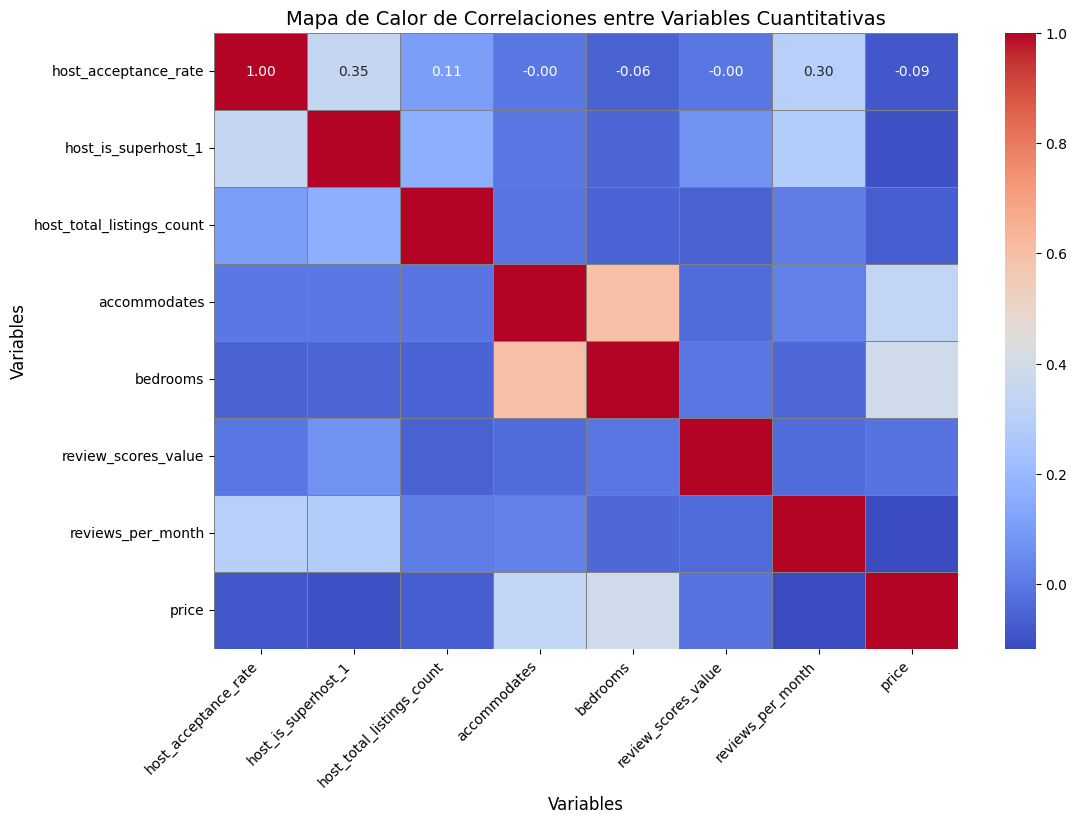

In [111]:
# Calcular matriz de correlación
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    df_cuant.corr(), 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    annot_kws={"size": 10},  # Ajustar tamaño de los números dentro del gráfico
    linewidths=0.5,  # Separación entre celdas
    linecolor="gray"  # Color de líneas de separación
)

# Agregar etiquetas y título
plt.title("Mapa de Calor de Correlaciones entre Variables Cuantitativas", fontsize=14)
plt.xlabel("Variables", fontsize=12)
plt.ylabel("Variables", fontsize=12)

# Rotar etiquetas en los ejes para mejor legibilidad
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Mostrar el gráfico
plt.show()
